In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from collections import Counter
from six.moves import cPickle as pickle
from scipy import ndimage
from scipy.misc import imresize
import tensorflow as tf
from collections import Counter
import copy

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

print('Modules loaded.')

Modules loaded.


In [2]:
with open('train_metadata.pickle', 'rb') as f:
    train_metadata = pickle.load(f)

with open('./test_metadata.pickle', 'rb') as f:
    test_metadata = pickle.load(f)
    
with open('./extra_metadata.pickle', 'rb') as f:
    extra_metadata = pickle.load(f)

In [3]:
def remove_item_by_sequence_length(metadata, length):
    itemindex = np.argwhere(np.array(metadata['length'])==length)
    
    if (len(itemindex)>0):
        for i in range(len(itemindex)):
            del metadata['image'][np.asscalar(itemindex[i])]
            del metadata['length'][np.asscalar(itemindex[i])]
            del metadata['label'][np.asscalar(itemindex[i])]
            del metadata['width'][np.asscalar(itemindex[i])]
            del metadata['height'][np.asscalar(itemindex[i])]
            del metadata['top'][np.asscalar(itemindex[i])]
            del metadata['left'][np.asscalar(itemindex[i])]
        print('%s item removed.' % len(itemindex))
    else:
        print('No item with length %s.' % length)
    return metadata

In [4]:
train_metadata=remove_item_by_sequence_length(train_metadata, 6)

1 item removed.


In [5]:
train_labels = np.zeros((1,5),dtype=np.int32)
for i in range(len(train_metadata['length'])):
    l=train_metadata['length'][i]
    label = 10*np.ones((1,5),dtype=np.int32)
    for j in range(l):
        label[0,j]=train_metadata['label'][i][j]
    train_labels = np.concatenate((train_labels,label),axis=0)
train_labels=train_labels[1:,:]
print(train_labels.shape)

(33401, 5)


In [6]:
extra_labels = np.zeros((1,5),dtype=np.int32)
for i in range(len(extra_metadata['length'])):
    l=extra_metadata['length'][i]
    label = 10*np.ones((1,5),dtype=np.int32)
    for j in range(l):
        label[0,j]=extra_metadata['label'][i][j]
    extra_labels = np.concatenate((extra_labels,label),axis=0)
extra_labels=extra_labels[1:,:]
print(extra_labels.shape)

(202353, 5)


In [7]:
combined_train_labels = np.concatenate((train_labels,extra_labels),axis=0)
print(combined_train_labels.shape)

(235754, 5)


In [8]:
train_length = np.array(train_metadata['length'])
extra_length = np.array(extra_metadata['length'])
combined_train_length=np.concatenate((train_length,extra_length),axis=0)
print(combined_train_length.shape)

(235754,)


In [9]:
def plot_length_hist(data,max_freq,title):
    label_chars=['1','2','3','4','5']
    tickLocations = np.arange(len(label_chars))

    fig, ax = plt.subplots(figsize=(6, 3.5))
    n, bins, patches = plt.hist(data-1, bins=range(0,12), align='left')
    ax.set_xticks(ticks= tickLocations)
    ax.set_xticklabels(label_chars)
    plt.axis([-1,5,0,max_freq])
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Digit sequence length")
    plt.show()

In [10]:
def plot_position_hist(data,title,max_freq):
    label_chars=['0','1','2','3','4','5','6','7','8','9','_']
    tickLocations = np.arange(len(label_chars))

    fig, ax = plt.subplots(figsize=(4, 3.5))
    n, bins, patches = plt.hist(data, bins=range(0,12), align='left')
    ax.set_xticks(ticks= tickLocations)
    ax.set_xticklabels(label_chars)
    plt.axis([-1,11,0,max_freq])
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Digit")
    plt.show()

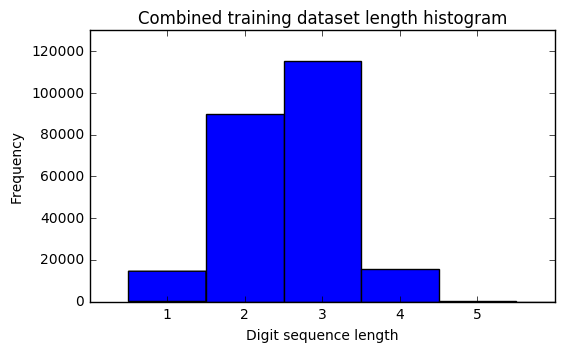

In [11]:
plot_length_hist(combined_train_length, 130000, "Combined training dataset length histogram")

In [12]:
Counter(combined_train_length)

Counter({1: 14522, 2: 89856, 3: 115480, 4: 15772, 5: 124})

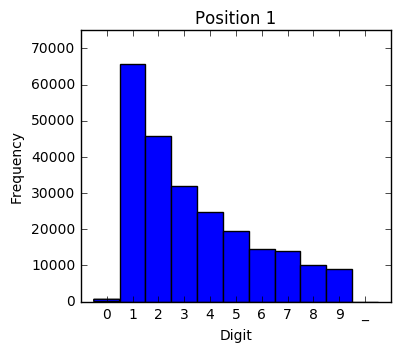

In [13]:
plot_position_hist(combined_train_labels[:,0],"Position 1",75000)

In [14]:
Counter(combined_train_labels[:,0])

Counter({0: 623,
         1: 65602,
         2: 45816,
         3: 31933,
         4: 24847,
         5: 19434,
         6: 14459,
         7: 13835,
         8: 10119,
         9: 9086})

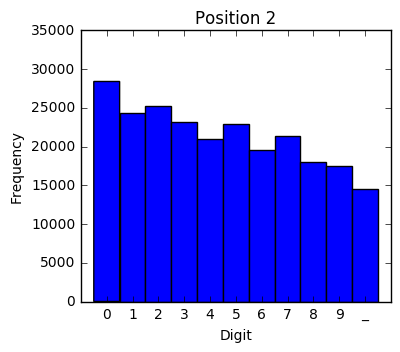

In [15]:
plot_position_hist(combined_train_labels[:,1],"Position 2",35000)

In [16]:
Counter(combined_train_labels[:,1])

Counter({0: 28390,
         1: 24362,
         2: 25168,
         3: 23135,
         4: 20960,
         5: 22934,
         6: 19509,
         7: 21325,
         8: 18025,
         9: 17424,
         10: 14522})

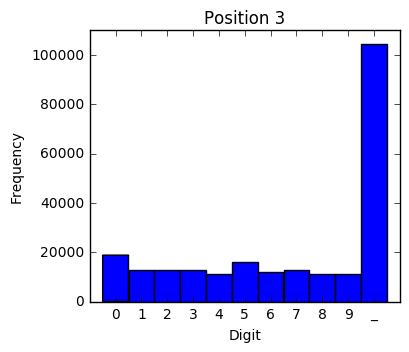

In [17]:
plot_position_hist(combined_train_labels[:,2],"Position 3",110000)

In [18]:
Counter(combined_train_labels[:,2])

Counter({0: 18805,
         1: 12818,
         2: 12897,
         3: 12716,
         4: 10964,
         5: 16051,
         6: 11956,
         7: 12910,
         8: 10961,
         9: 11298,
         10: 104378})

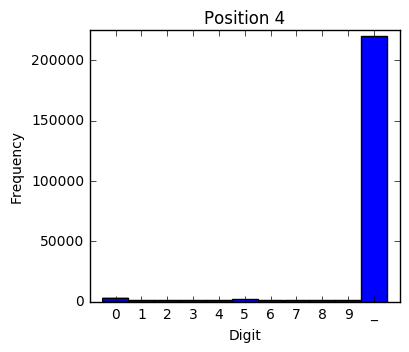

In [19]:
plot_position_hist(combined_train_labels[:,3],"Position 4",225000)

In [20]:
Counter(combined_train_labels[:,3])

Counter({0: 2661,
         1: 1624,
         2: 1437,
         3: 1466,
         4: 1311,
         5: 1939,
         6: 1371,
         7: 1506,
         8: 1290,
         9: 1291,
         10: 219858})

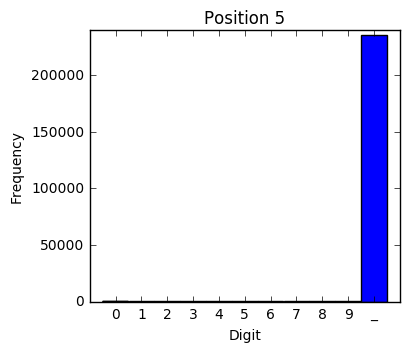

In [21]:
plot_position_hist(combined_train_labels[:,4],"Position 5",240000)

In [22]:
Counter(combined_train_labels[:,4])

Counter({0: 19,
         1: 14,
         2: 7,
         3: 11,
         4: 8,
         5: 12,
         6: 14,
         7: 16,
         8: 7,
         9: 16,
         10: 235630})